# Dyadic citation frequencies
In this notebook, we'll explore the frequency of citations within and across the kingdom classes of the citation network.

In [1]:
import networkx as nx
import sys
sys.path.append('../citation_network/')
import utils
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from collections import defaultdict
import seaborn as sns
import pandas as pd

## Read in the graph

In [2]:
graph = nx.read_graphml('../data/citation_network/core_collection_destol_or_anhydro_FILTERED_classified_network_06Jan2023_MANUALLY_VERIFIED.graphml')

## Calculate frequencies

In [3]:
dyadic_freqs = utils.calculate_dyadic_citation_freqs(graph)

## Visualize
To visualize, we'll create a graph with one node to represent each study system, and then visualize the citation frequencies between nodes as edges with varying weights.

In [4]:
colors = {'Plant': '#228833', 'Animal':'#EE6677', 'Microbe': '#4477AA', 'Fungi':'#CCBB44'}

In [5]:
nodes = list(set([k[0] for k in dyadic_freqs.keys()]))
nodes = [(n, {'color': colors[n]}) for n in nodes]
nodes

[('Plant', {'color': '#228833'}),
 ('Microbe', {'color': '#4477AA'}),
 ('Animal', {'color': '#EE6677'}),
 ('Fungi', {'color': '#CCBB44'})]

In [6]:
edges = [(k[0], k[1], {'weight': round(v, 2)*10, 'color': colors[k[0]]}) for k, v in dyadic_freqs.items()]
edges[:5]

[('Plant', 'Plant', {'weight': 9.399999999999999, 'color': '#228833'}),
 ('Plant', 'Microbe', {'weight': 0.2, 'color': '#228833'}),
 ('Plant', 'Animal', {'weight': 0.3, 'color': '#228833'}),
 ('Plant', 'Fungi', {'weight': 0.1, 'color': '#228833'}),
 ('Microbe', 'Plant', {'weight': 3.0, 'color': '#4477AA'})]

In [7]:
dyadic_freq_graph = nx.MultiDiGraph()
_ = dyadic_freq_graph.add_nodes_from(nodes)
_ = dyadic_freq_graph.add_edges_from(edges)

/tmp/local/29027367/ipykernel_7872/178459929.py:10: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  _ = nx.draw_networkx_edges(dyadic_freq_graph, pos, width=edge_weights, edge_color=edge_colors, connectionstyle='arc3, rad = 0.1')


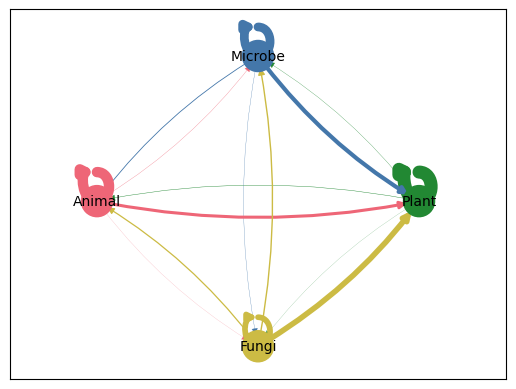

In [8]:
nodes = dyadic_freq_graph.nodes(data=True)
node_colors = [attrs['color'] for n, attrs in nodes]
edges = dyadic_freq_graph.edges(data=True)
edge_colors = [attrs['color'] for e1, e2, attrs in edges]
edge_weights = [attrs['weight'] for e1, e2, attrs in edges]

plt.margins(x=0.2)
pos = nx.circular_layout(dyadic_freq_graph)
nx.draw_networkx_nodes(dyadic_freq_graph, pos, node_size=500, node_color=node_colors)
_ = nx.draw_networkx_edges(dyadic_freq_graph, pos, width=edge_weights, edge_color=edge_colors, connectionstyle='arc3, rad = 0.1')
_ = nx.draw_networkx_labels(dyadic_freq_graph, pos, font_size=10, font_family="sans-serif")

We want to make some aesthetic changes to the self-loops, which isn't straightforward in networkx. We're going to use the code from [this StackOverflow answer](https://stackoverflow.com/questions/74350464/how-to-better-visualize-networkx-self-loop-plot) to accomplish this task.

In [9]:
class SelfLoop():
    def __init__(self, v_scale=0.25, h_scale=0.25, nodesize=100):
        self.v_scale = v_scale
        self.h_scale = h_scale
        self.nodesize = nodesize

    def selfloopstyle(self, posA, posB, *args, **kwargs):
        from matplotlib.path import Path

        selfloop_ht = 0.005 * self.nodesize

        data_loc = ax.transData.inverted().transform(posA)
        v_shift = self.v_scale * selfloop_ht
        h_shift = v_shift * self.h_scale

        path = [
            data_loc + np.asarray([0, v_shift]),
            data_loc + np.asarray([h_shift, v_shift]),
            data_loc + np.asarray([h_shift, 0]),
            data_loc,
            data_loc + np.asarray([-h_shift, 0]),
            data_loc + np.asarray([-h_shift, v_shift]),
            data_loc + np.asarray([0, v_shift]),
        ]

        ret = Path(ax.transData.transform(path), [1, 4, 4, 4, 4, 4, 4])

        return ret
    
    def style(self):
        return self.selfloopstyle

/tmp/local/29027367/ipykernel_7872/4269563302.py:14: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  e = nx.draw_networkx_edges(dyadic_freq_graph, pos, width=edge_weights, edge_color=edge_colors, connectionstyle='arc3, rad = 0.1', node_size=nodesize)


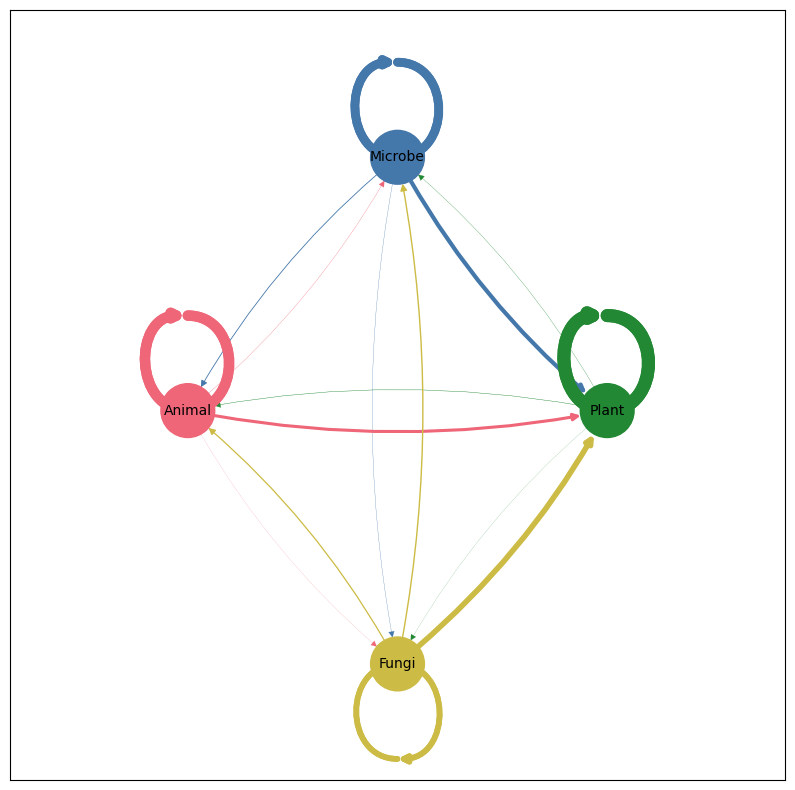

In [10]:
nodes = dyadic_freq_graph.nodes(data=True)
node_colors = [attrs['color'] for n, attrs in nodes]
edges = dyadic_freq_graph.edges(data=True)
edge_colors = [attrs['color'] for e1, e2, attrs in edges]
edge_weights = [attrs['weight'] for e1, e2, attrs in edges]

pos = nx.circular_layout(dyadic_freq_graph)
fig, ax = plt.subplots(figsize=(10,10))
plt.margins(x=0.2)

nodesize=1500
nx.draw_networkx_nodes(dyadic_freq_graph, pos, node_size=nodesize, node_color=node_colors)
_ = nx.draw_networkx_labels(dyadic_freq_graph, pos, font_size=10, font_family="sans-serif")
e = nx.draw_networkx_edges(dyadic_freq_graph, pos, width=edge_weights, edge_color=edge_colors, connectionstyle='arc3, rad = 0.1', node_size=nodesize)

ax.set_xlim([1.2*x for x in ax.get_xlim()])
ax.set_ylim([1.2*y for y in ax.get_ylim()])

horiz = 0.7
vert = 0.05
for i, edge in enumerate(edges):
    if edge[0] == edge[1]:
        if edge[0] == 'Fungi':
            e[i]._connector = SelfLoop(-vert, horiz, nodesize=nodesize).style() #select self loop and change connector
            ax.add_patch(e[i]) #add the patch to ax
#         elif edge[0] == 'Plant':
#             e[i]._connector = SelfLoop(vert, horiz, nodesize=nodesize).style() #select self loop and change connector
#             ax.add_patch(e[i]) #add the patch to ax
#         elif edge[0] == 'Microbe':
#             e[i]._connector = SelfLoop(vert, horiz, nodesize=nodesize).style() #select self loop and change connector
#             ax.add_patch(e[i]) #add the patch to ax
#         elif edge[0] == 'Fungi':
        else:
            e[i]._connector = SelfLoop(vert, horiz, nodesize=nodesize).style() #select self loop and change connector
            ax.add_patch(e[i]) #add the patch to ax
plt.savefig('../data/citation_network/figures/dyadic_citation_frequencies.png', format='png', bbox_inches='tight', dpi=600)

## Test explantory hypotheses
In this section, we'll take a look at some of the hypotheses from [Theory Meets Empiry: A Citation Network Analysis](https://academic.oup.com/bioscience/article-pdf/68/10/805/26119302/biy083.pdf).
### Null expectation hypothesis
One explanation for why Plant papers cite their own discipline so much more often is because they make up such a large proportion of the literature in this field. Specifically, one statement of this null hypothesis is that each paper should cite each discipline in the frequency that it appears in the larger literature. For example, if Plant papers are 70% of the literature, 70% of all citations for any paper should be to Plant papers. Is that true for our dataset?

In [16]:
percents = {'UID': [], 'Plant': [], 'Animal': [], 'Microbe': [], 'Fungi': []}
systems = nx.get_node_attributes(graph, 'study_system')
for uid, attrs in graph.nodes(data=True):
    citations = graph.neighbors(uid)
    num_cites = len(list(citations))
    if num_cites != 0:
        sys_tots = defaultdict(int)
        for cite in citations:
            sys_tots[systems[cite]] += 1
        sys_percents = {k: v/num_cites for k, v in sys_tots.items()}
        for sys in percents.keys():
            if sys in sys_percents.keys():
                
                percents[sys].append(sys_percents[sys])
            else:
                percents[sys].append(0)

In [17]:
percents_df = pd.DataFrame(percents)
percents_df.head()

ValueError: All arrays must be of the same length

## Distribution of degrees
Another thing we may want to look at is the distribution of in-degree/out-degree in each discipline, so we can plot that here.

In [11]:
# Separate nodeIDs by class
class_node_UIDs = defaultdict(list)
for node, attrs in graph.nodes(data=True):
    class_node_UIDs[attrs['study_system']].append(node)

In [20]:
# Get in and out degrees
in_degrees = {'study_system': [], 'in_degree': []}
for study_system in ['Plant', 'Animal', 'Microbe', 'Fungi']:
    for deg in graph.in_degree(class_node_UIDs[study_system]):
        in_degrees['study_system'].append(study_system)
        in_degrees['in_degree'].append(deg[1])
in_deg_df = pd.DataFrame(in_degrees)
out_degrees = {'study_system': [], 'out_degree': []}
for study_system in ['Plant', 'Animal', 'Microbe', 'Fungi']:
    for deg in graph.out_degree(class_node_UIDs[study_system]):
        out_degrees['study_system'].append(study_system)
        out_degrees['out_degree'].append(deg[1])
out_deg_df = pd.DataFrame(out_degrees)

/mnt/home/lotrecks/anaconda3/envs/graphs/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


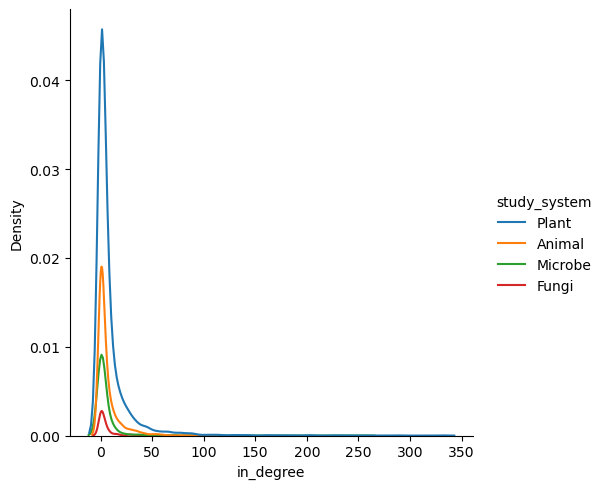

In [21]:
# Plot
sns.displot(data=in_degrees, x='in_degree', hue='study_system', kind='kde')

/mnt/home/lotrecks/anaconda3/envs/graphs/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


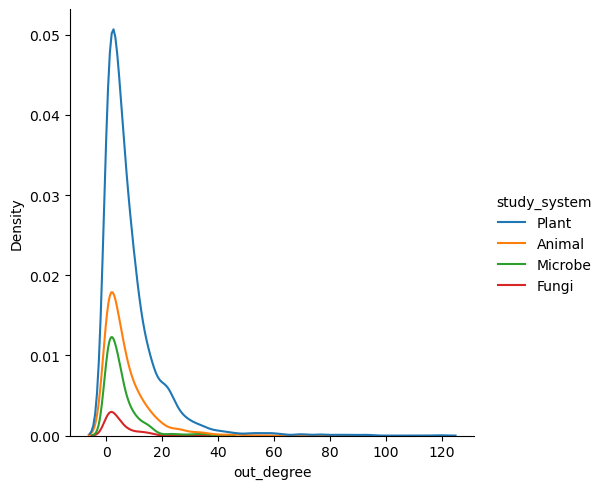

In [22]:
# Plot
sns.displot(data=out_degrees, x='out_degree', hue='study_system', kind='kde')